### Decision boundary
    We know that logistic regression uses sigmoid function g(z) for given input z and the curve is S shaped. It ranges from 0 to 1. 
    
    The sigmoid function g(z) ranges between 0 and 1. Since classification needs only 2 labels either 0 or 1, we are making use of threshold concept. So, for predicting the labels for the given training examples, we apply a threshold of say 0.5(midpoint) of the curve and we say,
    
        if g(z) >= 0.5 then the predicted label f_wb(x) is 1
        if g(z) < 0.5, then the predicted label f_wb(x) is 0
        
     So, when g(z) >=0.5, it turns out that if we observe the curve (in the previous labs), it is when z > 0.
     Likewise when z < 0, g(z) < 0.5
     
     This is our decision rule. if z = w.x + b >= 0 then model predicts y=1
                                if w.x + b < 0 then model predicts y=1
     
     But when z will be > or < 0. We donno. Hence it we are considering something neutral line where z = 0
     
     This z = 0 is neutral that is neither > or < 0. It is exactly 0. This is our decision boundary "z = 0" => w. x + b = 0
     With this decision boundary, we ll say points left to the boundary are of class 0 and point right to the boundary are of class 1.
     
     The same is true if we consider our actual logistic regression model with sigmoid function: 1 / 1 + e^-z
     
         Here if z<0 i.e negative , then 1 / 1 + e^-(negnumber) = 1 / 1+somebignumber = 1 / bignumber = 0. .. = close to 0
         Here if z>=0 i.e positive , then 1 / 1 + e^-(posnumber) = 1 / 1+smallnumber = 1 / numbercloseto1 = 1. .. = close to 1
         
     Note: Decision boundary is linear, if z is simple linear equation like w.x + b = (w1x1 + w2x2 + ..wnxn) + b
           Decision boundary is non linear, if z is complex higher order polynimoial equation like (w1 x1 + w2 x2 + w3 x1^2 + w4 x2^2+ w5 x1x2) + b

In [39]:
#Decision boundary
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

In [4]:
#input - 2d data
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)
print(f"X.shape - {X.shape}")
print(f"Y.shape - {y.shape}")

X.shape - (6, 2)
Y.shape - (6, 1)


In [40]:
#plotting the 2d input array
def plot(x, y, ax):
    pos = y==1 #gives 2d array - (6, 1) [[False, False, False, True, True, True]]
    neg = y==0
    pos = pos.reshape(-1,) #reshape the pos to 1d - (6,) - [False, False, False, True, True, True]
    neg = neg.reshape(-1,)
    
    ax.scatter(x[pos, 0], x[pos, 1], label="y=1", marker="X", lw=2, c="r", s=80) #getting pos rows from x1 and x2
    ax.scatter(x[neg, 0], x[neg, 1], label="y=0", marker="o", s=80, facecolors='none', edgecolors="#0096ff", lw=3)
    ax.legend(loc="best")
    
    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

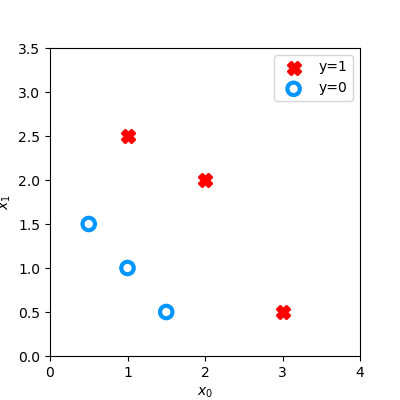

In [37]:
#plotting the training data
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
plot(X, y, axes)

axes.axis([0, 4, 0, 3.5])
axes.set_xlabel(r"$x_0$"); axes.set_ylabel(r"$x_1$");
plt.show()

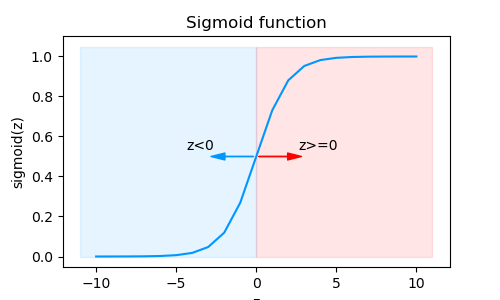

In [59]:
#lets plot the sigmoid function for given z
def sigmoid(z):
    """
    Compute the sigmoid function of z
    Args:
    z (ndarray) : a scalar, numpy array of any size
    
    Returns:
    g (ndarray) : sigmoid(z), with same as shape as z
    """
    g = 1 / (1 + np.exp(-z))
    return g

def draw_vthresh(ax, x):
    xlim = ax.get_xlim() #(-11.0, 11.0)
    ylim = ax.get_ylim() #(-0.049, 1.049)
    
    ax.fill_between([xlim[0], x], [ylim[1], ylim[1]], alpha=0.1, color="#0096ff") #right colored space
    ax.fill_between([x, xlim[1]], [ylim[1], ylim[1]], alpha=0.1, color="red") #left colored spaxe
    
    ax.annotate("z>=0", xy=[x, 0.5], xycoords="data", xytext=[30, 5], textcoords="offset points") #text
    d = FancyArrowPatch(posA=(x, 0.5), posB=(x+3, 0.5), color="r",
                       arrowstyle="simple, head_width=5, head_length=10, tail_width=0.0") #arrow
    ax.add_artist(d)
    
    ax.annotate("z<0", xy=[x, 0.5], xycoords="data", xytext=[-50, 5], textcoords="offset points", ha="left")
    d = FancyArrowPatch(posA=(x, 0.5), posB=(x-3, 0.5), color="#0096ff",
                       arrowstyle="simple, head_width=5, head_length=10, tail_width=0.0")
    ax.add_artist(d)

# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10, 11)

fig,ax = plt.subplots(1, 1, figsize=(5, 3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="#0096ff")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax, 0)
plt.show()

### Plotting decision boundary
    Now, let's go back to our example to understand how the logistic regression model is making predictions by plotting its decision boundary.
    
    we know that z = w.x + b. Here z = w0x0 + w1x1 + b

    Let's say that you trained the model and get the parameters as b=-3, w0=1, w1=1.
    
    That is, Our logistic regression model has the form f(x) = g(x0 + x1 -3)

    From what you've learnt above, you can see that this model predicts y=1 if -3 + x0 + x1 >= 0
 
    Let's see what this looks like graphically. We'll start by plotting the decision boundary i.e z= 0
     => -3 + x0 + x1 = 0, which is equivalent to x1 = 3 - x0

[0 1 2 3 4 5]


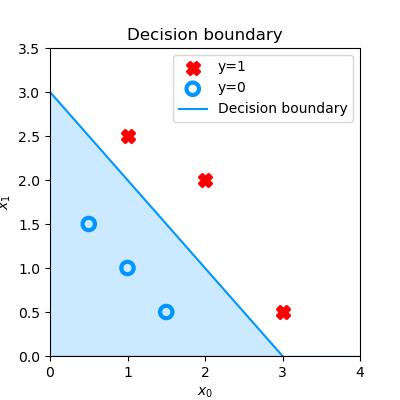

In [82]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

x0 = np.arange(0, 6) #[0 1 2 3 4 5]
print(x0)
x1 = 3 - x0 #decision boundary with params w0, w1 = 1 and b=-3

plt.close("all")
fig, axes = plt.subplots(1, 1, figsize=(4, 4))

#plot original data
plot(X, y, axes)

#plot decision boundary
axes.plot(x0, x1, c="#0096ff", label="Decision boundary")
axes.axis([0, 4, 0, 3.5])
# Fill the region below the line
axes.fill_between(x0, x1, alpha=0.2, color="#0096ff")
axes.set_xlabel(r"$x_0$"); axes.set_ylabel(r"$x_1$"); axes.set_title("Decision boundary")
axes.legend(loc="best")
axes.figure.canvas.toolbar_visible = False
axes.figure.canvas.footer_visible = False
axes.figure.canvas.header_visible = False


plt.show()

    In the plot above, the blue line represents the line x0 + x1 - 3 = 0
    
    and it should intersect the x1 axis at 3 (if we set x1 = 3, x0 = 0) and the x0 axis at 3 (if we set x1 = 0, x0 = 3).

    The shaded region represents -3 + x0 + x1 < 0. The region above the line is -3 + x0 + x1 >= 0

    Any point in the shaded region (under the line) is classified as y=0.
    Any point on or above the line is classified as y=1

    This line is known as the "decision boundary".

    As we've seen in the lectures, by using higher order polynomial terms (eg: f(x) = g(x0^2 + x1 - 1), we can come up with more complex non-linear boundaries.